<a href="https://colab.research.google.com/github/vcorredorg/SenalesySistemas2025/blob/main/Serie_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Serie de Fourier

In [20]:
#Importar librerías
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Ejercicio: Serie exponencial de Fourier

Encontrar la representación por **serie exponencial de Fourier** de la señal  

$$
x(t) = A \, \text{rect}_{\tau/2}(t), \quad t \in [-\tau/2, \, \tau/2]
$$  

Graficar:

- El **espectro**  
- La **fase del espectro**  
- La **reconstrucción** para  
  $$
  n \in \{0, \pm1, \pm2, \ldots\}
  $$
- Determinar el **valor del error relativo** para cada valor de $n$.  

Utilice el **ambiente de animación de Python** para mostrar los resultados.


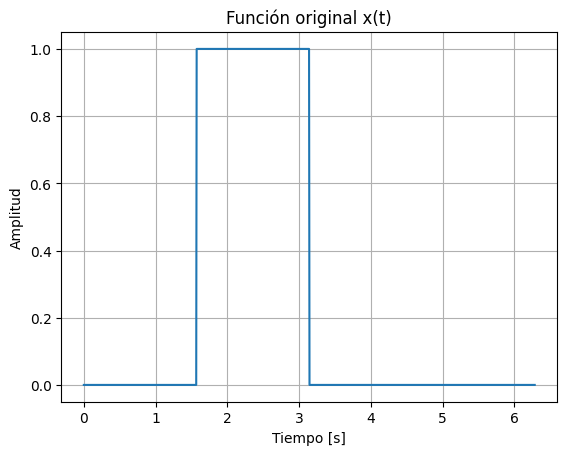

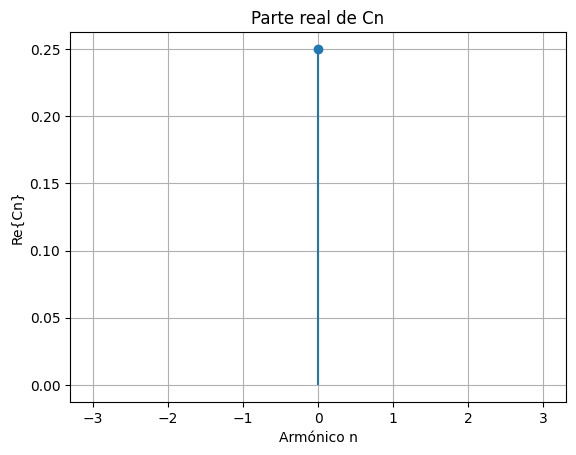

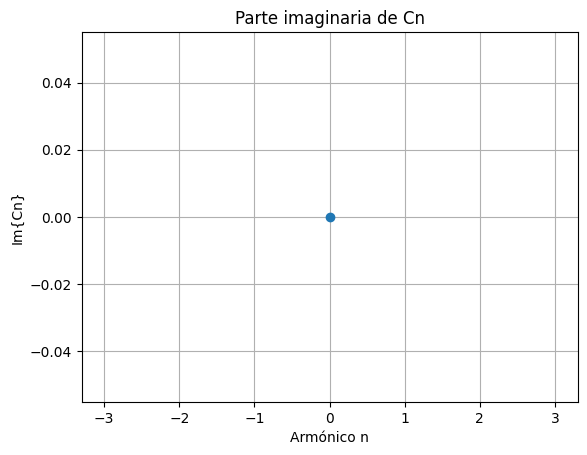

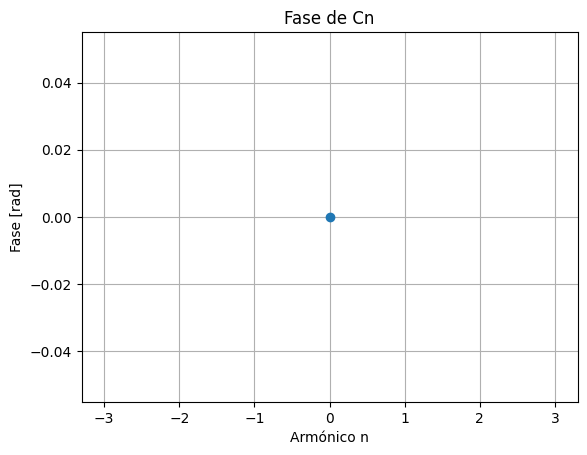

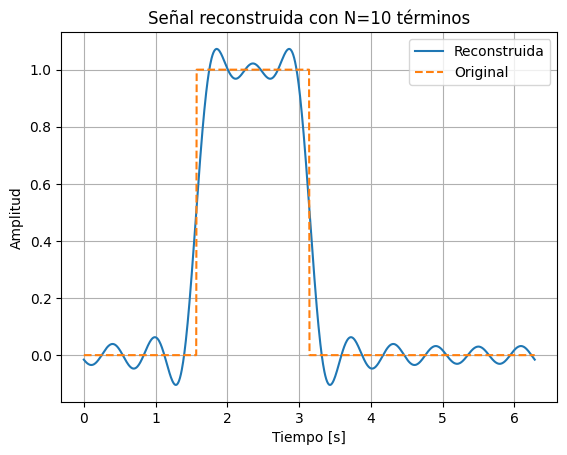

In [22]:
# Parámetros simbólicos
t = sym.Symbol('t', real=True)
T = 2 * sym.pi
w0 = 2 * sym.pi / T
n = sym.Symbol('n', integer=True)

# Definición simbólica de la función rectangular (1 entre T/4 y T/2)
x = sym.Heaviside(t - T/4) - sym.Heaviside(t - T/2)

# Graficar la función original
t_vals = np.linspace(0, float(T), 1000)
x_func = sym.lambdify(t, x, 'numpy')
x_vals = x_func(t_vals)

plt.figure()
plt.title("Función original x(t)")
plt.plot(t_vals, x_vals)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

# Espectro de Fourier
f = x * sym.exp(-sym.I * n * w0 * t)
Cn = (1/T) * sym.integrate(f, (t, 0, T))
Cn_sim = sym.simplify(Cn)

# Evaluar Cn para varios n
n_vals = np.arange(-3, 4)  # armónicos de -3 a 3
Cn_func = sym.lambdify(n, Cn_sim, 'numpy')
Cn_vals = Cn_func(n_vals)

# Graficar parte real, imaginaria y fase
plt.figure()
plt.stem(n_vals, np.real(Cn_vals), basefmt=" ")
plt.title("Parte real de Cn")
plt.xlabel("Armónico n")
plt.ylabel("Re{Cn}")
plt.grid(True)

plt.figure()
plt.stem(n_vals, np.imag(Cn_vals), basefmt=" ")
plt.title("Parte imaginaria de Cn")
plt.xlabel("Armónico n")
plt.ylabel("Im{Cn}")
plt.grid(True)

plt.figure()
plt.stem(n_vals, np.angle(Cn_vals), basefmt=" ")
plt.title("Fase de Cn")
plt.xlabel("Armónico n")
plt.ylabel("Fase [rad]")
plt.grid(True)

# Reconstruir la señal
N = 10  # número de términos
xt_fourier = 0
for k in range(-N, N + 1):
    Ck = Cn.subs(n, k)
    xt_fourier += Ck * sym.exp(sym.I * 2 * np.pi * k * t / T)

# Crear función evaluable numéricamente para xt_fourier
xf_func = sym.lambdify(t, xt_fourier, 'numpy')
xf_vals = xf_func(t_vals)

# Graficar señal reconstruida
plt.figure()
plt.title(f"Señal reconstruida con N={N} términos")
plt.plot(t_vals, np.real(xf_vals), label='Reconstruida')
plt.plot(t_vals, x_vals, '--', label='Original')
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

